# Dados cartográficos com Python

## GeoPandas

GeoPandas é uma biblioteca do Python que estende as funcionalidades do Pandas, permitindo que se trabalhe de maneira eficiente com dados geoespaciais. Ela é construída sobre outras bibliotecas populares como Shapely, Fiona e Pyproj, o que lhe permite manipular, analisar e visualizar dados geoespaciais de forma integrada e simplificada.

A principal característica do GeoPandas é a capacidade de lidar com geometrias (pontos, linhas, polígonos, etc.) em colunas especiais chamadas de `GeoSeries`. Essas geometrias podem ser usadas para representar entidades espaciais, como localizações geográficas, fronteiras de cidades, ou trajetórias. Cada linha de um `GeoDataFrame`—a versão geoespacial do `DataFrame` no Pandas—pode conter uma geometria associada a outros atributos, permitindo que se façam análises espaciais sobre os dados.

Com o GeoPandas, tarefas comuns em análise geoespacial, como a leitura de arquivos shapefile, a re-projeção de sistemas de coordenadas e operações espaciais (interseção, união, diferenciação) tornam-se muito mais fáceis. A biblioteca é amplamente usada em aplicações que envolvem geoprocessamento, cartografia e estudos de geografia.

GeoPandas também se integra bem com bibliotecas de visualização como Matplotlib, facilitando a criação de mapas e gráficos baseados em dados espaciais. Ela é amplamente usada em estudos ambientais, urbanos, logísticos e em qualquer área que necessite de análise espacial eficiente.

https://geopandas.org/en/stable/index.html

## Folium

Folium é uma biblioteca do Python voltada para a criação de mapas interativos utilizando Leaflet.js, uma popular biblioteca JavaScript de mapeamento. O Folium permite que se criem mapas ricos e dinâmicos diretamente em Python, integrando dados geoespaciais de maneira simples e intuitiva.

Uma das principais vantagens do Folium é a facilidade com que ele transforma dados geoespaciais, como pontos de interesse, trajetos ou áreas geográficas, em visualizações interativas. Ele suporta uma ampla gama de camadas, como marcadores, polígonos, retângulos e círculos, que podem ser facilmente sobrepostos em diferentes tipos de mapas base, como mapas de ruas ou satélites. Além disso, a biblioteca permite adicionar informações complementares por meio de popups e tooltips, o que facilita a apresentação de dados complexos de forma clara e acessível.

Folium é frequentemente utilizado em projetos que requerem visualizações de dados espaciais interativas, como análise de trajetórias, planejamento urbano, monitoramento ambiental e estudos logísticos. Sua integração com outras bibliotecas como Pandas e GeoPandas permite manipular dados e criar mapas de forma eficiente. A biblioteca também facilita a exportação dos mapas para HTML, o que é útil para incorporá-los em sites ou relatórios interativos.

De maneira geral, Folium oferece uma solução para transformar dados geoespaciais em mapas interativos, sendo uma escolha popular tanto em análises exploratórias quanto na apresentação final de resultados.

https://python-visualization.github.io/folium/latest/#

In [74]:
import folium
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from folium import plugins
from shapely.geometry import Point

from src.config import DADOS_LIMPOS, DADOS_GEO_ORIGINAIS
from src.graficos import SCATTER_ALPHA, PALETTE

sns.set_theme(style="white", palette="bright")

In [9]:
df = pd.read_parquet(DADOS_LIMPOS)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_households,population_per_househoulds,bedrooms_per_room
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   longitude                   17564 non-null  float32 
 1   latitude                    17564 non-null  float32 
 2   housing_median_age          17564 non-null  int8    
 3   total_rooms                 17564 non-null  int16   
 4   total_bedrooms              17564 non-null  int16   
 5   population                  17564 non-null  int16   
 6   households                  17564 non-null  int16   
 7   median_income               17564 non-null  float32 
 8   median_house_value          17564 non-null  int32   
 9   ocean_proximity             17564 non-null  category
 10  median_income_cat           17564 non-null  int64   
 11  rooms_per_households        17564 non-null  float32 
 12  population_per_househoulds  17564 non-null  float32 
 13  bedrooms_per_roo

In [11]:
gdf_counties = gpd.read_file(DADOS_GEO_ORIGINAIS)

gdf_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.1839, -121.46238 41.18..."
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933..."
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9..."
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7..."
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3..."


O melhor termo para traduzir **"county"** seria **"condado"**. Embora o Brasil não tenha uma divisão administrativa exata equivalente aos condados dos Estados Unidos, "condado" é uma tradução apropriada e amplamente compreendida.

Nos EUA, os **counties** (condados) são subdivisões dos estados, com certa autonomia administrativa, similar às regiões intermediárias entre estados e municípios no Brasil. No entanto, a melhor correspondência prática no Brasil, considerando a divisão político-administrativa, seria com os **municípios**, que são as subdivisões administrativas dos estados brasileiros, apesar de suas diferenças em termos de autonomia e funções.


Em um arquivo GeoJSON, colunas como **"abcode"** e **"ansi"** contêm códigos padronizados que identificam de maneira única regiões geográficas, divisões administrativas ou entidades espaciais.

A coluna **"abcode"** representa **códigos de fronteira administrativa** (Administrative Boundary Code). Esses códigos são usados para identificar divisões administrativas, como estados, condados, cidades ou outras subdivisões de um país. Dependendo do contexto, "abcode" pode estar relacionado a códigos nacionais ou internacionais de áreas administrativas.

Por exemplo:
- Nos Estados Unidos, o "abcode" pode se referir a códigos FIPS (Federal Information Processing Standards), usados para identificar estados e condados.
- Em outros países, pode ser um código específico para uma província, estado ou outra divisão territorial.

A coluna **"ansi"** refere-se aos códigos do **American National Standards Institute (ANSI)** (American National Standards Institute Code), usados nos Estados Unidos para identificar regiões geográficas. O ANSI substituiu os códigos FIPS em 2008 como padrão de identificação de entidades geográficas, como estados e condados.

Por exemplo:
- Nos EUA, cada estado e condado tem um **ANSI code** único que os identifica de forma oficial. Para estados, o ANSI code é o mesmo que o código FIPS (geralmente um número de 2 dígitos), e para condados, é um número de 5 dígitos.

Assim: 

- **abcode**: Refere-se a um código de fronteira administrativa, usado para identificar divisões geográficas ou administrativas específicas, como estados, cidades ou condados.
- **ansi**: Refere-se a códigos padronizados pelo ANSI, usados principalmente nos EUA para identificar estados e condados. Esses códigos são uma forma de identificar regiões geográficas de maneira única e padronizada.

### Sobre sistemas de referência

Um Sistema de Referência de Coordenadas (CRS, do inglês *Coordinate Reference System*) é o conjunto de regras que define como os dados geoespaciais são projetados na superfície da Terra. Imagine o CRS como uma forma de "tradução" que nos ajuda a entender e posicionar os dados geográficos corretamente em um mapa. Cada ponto no mapa (como uma cidade, uma montanha ou uma estrada) tem coordenadas que dependem do CRS usado. Essas coordenadas podem ser expressas em diferentes sistemas, como latitudes e longitudes ou distâncias em metros.

Por que isso é importante? Quando trabalhamos com dados geoespaciais, especialmente em formatos como GeoJSON, Shapefiles ou outros, o CRS nos diz como interpretar as coordenadas. Por exemplo, o sistema mais comum que você verá é o WGS 84 (EPSG:4326), que usa latitude e longitude para posicionar qualquer ponto na Terra. No entanto, em projetos locais ou regionais, outros sistemas de referência podem ser usados, que distorcem menos as áreas específicas.

Quando você abre um arquivo GeoJSON ou outro tipo de dado geoespacial, muitas vezes verá algo como "crs": {"type": "name", "properties": {"name": "EPSG:4326"}}. Isso está simplesmente informando qual sistema está sendo usado para mapear as coordenadas no arquivo. Se diferentes arquivos estiverem em CRSs distintos, será necessário convertê-los para o mesmo sistema, ou eles não se alinharão corretamente quando visualizados juntos.



**WGS 84** é um sistema geodésico global que define um modelo matemático para a forma da Terra. Ele inclui um elipsoide de referência (uma representação matemática da Terra), um sistema de coordenadas cartesianas (X, Y, Z) e um sistema de coordenadas geográficas (latitude, longitude e altura). Esse sistema é amplamente usado em GPS e outros sistemas de posicionamento global, sendo uma das referências mais comuns para medir e mapear a superfície da Terra.

**EPSG:4326**, por outro lado, é o código de identificação que faz parte de uma base de dados chamada **EPSG Registry**, que contém descrições de vários sistemas de referência de coordenadas usados globalmente. O código **4326** se refere especificamente ao CRS que utiliza o **WGS 84** como sistema geodésico de base e expressa coordenadas em graus de latitude e longitude. Esse código é amplamente utilizado em formatos geoespaciais, como GeoJSON, para identificar que o sistema de coordenadas é o WGS 84.

Então, podemos dizer que **WGS 84** é o sistema geodésico, e **EPSG:4326** é o código que referencia esse sistema específico dentro de um conjunto de padrões geoespaciais. Eles estão intimamente relacionados, pois EPSG:4326 usa WGS 84, mas o EPSG:4326 é apenas uma forma de identificar esse sistema em softwares e arquivos.

#### Relação com as projeções de mapas

A Terra tem uma forma quase esférica (na verdade, ela é um esferoide oblato, ligeiramente achatada nos polos), mas os mapas são geralmente representações bidimensionais. Isso gera um desafio: como transformar a superfície curva da Terra em um mapa plano? É aí que entram as **projeções cartográficas**.

**Projeção cartográfica** é o método utilizado para "achatar" a superfície da Terra em um plano, permitindo a criação de mapas. Cada projeção tenta preservar algumas características da Terra (como áreas, formas ou distâncias), mas sempre há algum tipo de distorção, já que é impossível representar uma superfície curva em um plano sem perdas.

Agora, voltando ao **WGS 84** e **EPSG:4326**:

- **WGS 84** é um sistema de referência global que define coordenadas em latitude e longitude, como mencionado antes, sem aplicar diretamente uma projeção cartográfica. Ou seja, ele usa um sistema geodésico para definir onde os pontos estão na superfície curva da Terra, sem "achatar" essa superfície em um mapa.

- Quando usamos **EPSG:4326**, estamos trabalhando com coordenadas de latitude e longitude, mas sem projetar essas coordenadas em uma forma plana (ainda estamos no sistema esférico). Essa é uma das formas mais comuns de representar dados geoespaciais porque é universal e fácil de entender, mas não é exatamente uma projeção cartográfica.

As projeções cartográficas que aprendemos na escola—como a **projeção de Mercator** (que distorce áreas perto dos polos), a **projeção de Peters** (que tenta preservar áreas), ou a **projeção azimutal** (que preserva direções a partir de um ponto central)—são formas de transformar as coordenadas da Terra em um plano. Dependendo da finalidade do mapa, uma projeção pode ser mais adequada que outra.

Por exemplo:

- A **projeção de Mercator** é útil para navegação porque preserva ângulos e direções, mas distorce o tamanho das regiões conforme se aproximam dos polos.
- A **projeção de Peters** tenta representar as áreas de forma mais precisa, mas distorce as formas dos continentes.

Quando usamos um CRS como o **EPSG:4326** (WGS 84), estamos basicamente posicionando pontos na superfície curva da Terra. Para "achatar" esses pontos em um mapa, muitas vezes usamos uma projeção cartográfica. Por exemplo, se quisermos criar um mapa que use uma projeção de Mercator, utilizamos outro CRS específico para essa projeção, como o **EPSG:3857**, que é a projeção de Mercator.

Em resumo, os conceitos de sistemas de referência de coordenadas (CRS) e projeções cartográficas estão conectados. O CRS nos dá as coordenadas na superfície curva da Terra, e a projeção cartográfica define como essas coordenadas serão representadas em um mapa plano.

https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#spatial-joins

https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html

In [20]:
#transformando as informações de latitude e longitude em uma forma que o geopandas consiga entender

pontos = [Point(long, lat) for long, lat in zip(df['longitude'], df['latitude'])]

pontos[0:5]

[<POINT (-122.23 37.88)>,
 <POINT (-122.22 37.86)>,
 <POINT (-122.26 37.84)>,
 <POINT (-122.26 37.85)>,
 <POINT (-122.26 37.84)>]

In [21]:
#Transformando o geopandas em um geodataframe

gdf = gpd.GeoDataFrame(df, geometry=pontos)

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   longitude                   17564 non-null  float32 
 1   latitude                    17564 non-null  float32 
 2   housing_median_age          17564 non-null  int8    
 3   total_rooms                 17564 non-null  int16   
 4   total_bedrooms              17564 non-null  int16   
 5   population                  17564 non-null  int16   
 6   households                  17564 non-null  int16   
 7   median_income               17564 non-null  float32 
 8   median_house_value          17564 non-null  int32   
 9   ocean_proximity             17564 non-null  category
 10  median_income_cat           17564 non-null  int64   
 11  rooms_per_households        17564 non-null  float32 
 12  population_per_househoulds  17564 non-null  float32 
 13  bedrooms

In [22]:
#Informando ao geopandas dataframe qual o sistema de referência estou usando

gdf = gdf.set_crs(epsg=4326)

gdf_counties = gdf_counties.to_crs(epsg=4326)

In [23]:
#Verificando qual o crs usado no meu gdf

gdf_counties.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
#Fazendo a instersecção entre os dois dataframes

gdf_joined = gpd.sjoin(gdf, gdf_counties, how='left', predicate = 'within')

gdf_joined.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,rooms_per_households,population_per_househoulds,bedrooms_per_room,geometry,index_right,name,fullname,abbrev,abcode,ansi
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,...,6.984127,2.555556,0.146591,POINT (-122.23 37.88),34.0,Alameda,Alameda County,ALA,c001,001
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,...,6.238137,2.109842,0.155797,POINT (-122.22 37.86),34.0,Alameda,Alameda County,ALA,c001,001
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,...,4.294117,2.026891,0.260274,POINT (-122.26 37.84),34.0,Alameda,Alameda County,ALA,c001,001
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,...,4.242424,2.640152,0.252679,POINT (-122.26 37.85),34.0,Alameda,Alameda County,ALA,c001,001
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,...,5.343676,2.362768,0.203216,POINT (-122.26 37.84),34.0,Alameda,Alameda County,ALA,c001,001


In [25]:
gdf_joined = gdf_joined.drop(columns=['index_right', 'fullname', 'abcode', 'ansi'])

gdf_joined

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_households,population_per_househoulds,bedrooms_per_room,geometry,name,abbrev
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591,POINT (-122.23 37.88),Alameda,ALA
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797,POINT (-122.22 37.86),Alameda,ALA
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274,POINT (-122.26 37.84),Alameda,ALA
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679,POINT (-122.26 37.85),Alameda,ALA
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216,POINT (-122.26 37.84),Alameda,ALA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17559,-121.089996,39.480000,25,1665,374,845,330,1.5603,78100,INLAND,2,5.045455,2.560606,0.224625,POINT (-121.09 39.48),Yuba,YUB
17560,-121.209999,39.490002,18,697,150,356,114,2.5568,77100,INLAND,2,6.114035,3.122807,0.215208,POINT (-121.21 39.49),Yuba,YUB
17561,-121.220001,39.430000,17,2254,485,1007,433,1.7000,92300,INLAND,2,5.205543,2.325635,0.215173,POINT (-121.22 39.43),Yuba,YUB
17562,-121.320000,39.430000,18,1860,409,741,349,1.8672,84700,INLAND,2,5.329513,2.123209,0.219892,POINT (-121.32 39.43),Yuba,YUB


In [26]:
gdf_joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 17564 entries, 0 to 17563
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   longitude                   17564 non-null  float32 
 1   latitude                    17564 non-null  float32 
 2   housing_median_age          17564 non-null  int8    
 3   total_rooms                 17564 non-null  int16   
 4   total_bedrooms              17564 non-null  int16   
 5   population                  17564 non-null  int16   
 6   households                  17564 non-null  int16   
 7   median_income               17564 non-null  float32 
 8   median_house_value          17564 non-null  int32   
 9   ocean_proximity             17564 non-null  category
 10  median_income_cat           17564 non-null  int64   
 11  rooms_per_households        17564 non-null  float32 
 12  population_per_househoulds  17564 non-null  float32 
 13  bedrooms_per_

In [27]:
gdf_joined['name'].isnull().sum()

148

In [28]:
#Identificando quais são as linhas com ausencia de valores 

linhas_faltantes = gdf_joined[gdf_joined.isnull().any(axis=1)].index

linhas_faltantes

Index([ 1507,  1508,  1511,  1517,  1521,  2154,  2193,  2201,  2203,  2219,
       ...
       15747, 15748, 15752, 15755, 15756, 17198, 17199, 17201, 17232, 17258],
      dtype='int64', length=148)

In [29]:
#Tentando achar o ponto central de cada condado

gdf_counties['centroid'] = gdf_counties.centroid

gdf_counties.head()

C:\Users\rafae\AppData\Local\Temp\ipykernel_22572\194311171.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_counties['centroid'] = gdf_counties.centroid


,name,fullname,abbrev,abcode,ansi,geometry,centroid
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.1839, -121.46238 41.18...",POINT (-122.54047 41.59268)
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933...",POINT (-123.89681 41.74299)
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9...",POINT (-120.72517 41.58987)
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7...",POINT (-123.11264 40.65063)
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3...",POINT (-122.04016 40.76344)


In [30]:
#verificando o ponto no mapa onde está o dado

print(gdf_joined.loc[1507, 'geometry'])

POINT (-124.30000305175781 41.79999923706055)


In [31]:
#Calculando a distancia entre o meu ponto específico e os demais constantes na base de dados

gdf_counties['centroid'].distance(gdf_joined.loc[1507, 'geometry'])

C:\Users\rafae\AppData\Local\Temp\ipykernel_22572\3471856769.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_counties['centroid'].distance(gdf_joined.loc[1507, 'geometry'])


0      1.771700
1      0.407204
2      3.581004
3      1.652539
4      2.486229
5      3.872982
6      1.181051
7      2.658962
8      3.899362
9      3.440403
10     2.913231
11     4.386820
12     3.885950
13     3.111850
14     4.326303
15     3.336570
16     2.528645
17     3.799275
18     4.508214
19     4.834879
20     3.930031
21     5.506539
22     3.568571
23     3.837241
24     4.467937
25     6.649118
26     4.955842
27     4.248938
28     5.192143
29     5.754299
30     4.910558
31     4.069320
32     4.533433
33     5.374753
34     4.784590
35     6.091522
36     6.448327
37     4.438089
38     4.775127
39     5.836867
40     6.858891
41     5.258028
42     8.685359
43     5.271193
44     6.114297
45     7.834746
46     7.271996
47     6.366951
48    10.694858
49     8.527644
50     7.503716
51     9.007875
52     8.314811
53    11.571357
54    10.407882
55    12.512826
56     9.633791
57    11.578843
dtype: float64

In [32]:
def condado_mais_proximo(linha):
    ponto = linha['geometry']
    distancias = gdf_counties['centroid'].distance(ponto)
    indice_condado_mais_proximo = distancias.idxmin()
    condado_mais_proximo = gdf_counties.loc[indice_condado_mais_proximo]
    return condado_mais_proximo[['name', 'abbrev']]

In [33]:
condado_mais_proximo(gdf_joined.loc[1507])

C:\Users\rafae\AppData\Local\Temp\ipykernel_22572\2421161868.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distancias = gdf_counties['centroid'].distance(ponto)


name      Del Norte
abbrev          DNT
Name: 1, dtype: object

In [34]:
gdf_joined.loc[linhas_faltantes, ['name', 'abbrev']] = gdf_joined.loc[linhas_faltantes].apply(condado_mais_proximo, axis=1)



C:\Users\rafae\AppData\Local\Temp\ipykernel_22572\2421161868.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distancias = gdf_counties['centroid'].distance(ponto)
C:\Users\rafae\AppData\Local\Temp\ipykernel_22572\2421161868.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distancias = gdf_counties['centroid'].distance(ponto)
C:\Users\rafae\AppData\Local\Temp\ipykernel_22572\2421161868.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distancias = gdf_counties['centroid'].distance(ponto)
C:\Users\rafae\AppData\Local\Temp\ipykernel_22572\2421161868.py:3: UserWarni

In [35]:
gdf_joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 17564 entries, 0 to 17563
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   longitude                   17564 non-null  float32 
 1   latitude                    17564 non-null  float32 
 2   housing_median_age          17564 non-null  int8    
 3   total_rooms                 17564 non-null  int16   
 4   total_bedrooms              17564 non-null  int16   
 5   population                  17564 non-null  int16   
 6   households                  17564 non-null  int16   
 7   median_income               17564 non-null  float32 
 8   median_house_value          17564 non-null  int32   
 9   ocean_proximity             17564 non-null  category
 10  median_income_cat           17564 non-null  int64   
 11  rooms_per_households        17564 non-null  float32 
 12  population_per_househoulds  17564 non-null  float32 
 13  bedrooms_per_

In [36]:
gdf_joined['name'].value_counts()

name
Los Angeles        4827
San Diego          1467
Orange             1438
Santa Clara         824
Alameda             737
San Bernardino      729
Sacramento          622
Contra Costa        558
Riverside           504
Fresno              491
San Joaquin         387
Kern                353
Ventura             343
San Mateo           336
Sonoma              293
Stanislaus          282
Santa Barbara       261
Tulare              246
San Francisco       213
Santa Cruz          186
Solano              178
Monterey            170
Butte               144
San Luis Obispo     128
Marin               123
Merced              123
Shasta              119
Imperial            115
Humboldt            109
El Dorado           101
Placer              101
Napa                 94
Kings                86
Lake                 81
Nevada               80
Mendocino            77
Yolo                 74
Madera               74
Sutter               56
Yuba                 51
Tehama               47
Tuolumne   

<Axes: >

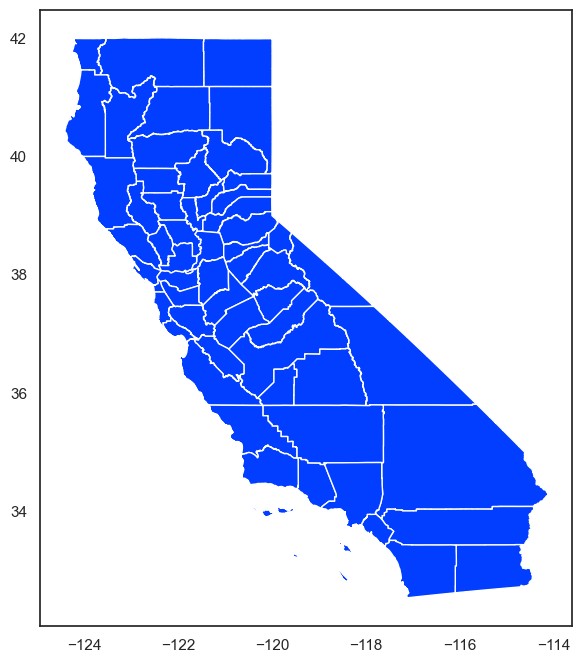

In [37]:
gdf_counties.plot(figsize=(12,8))

<Axes: >

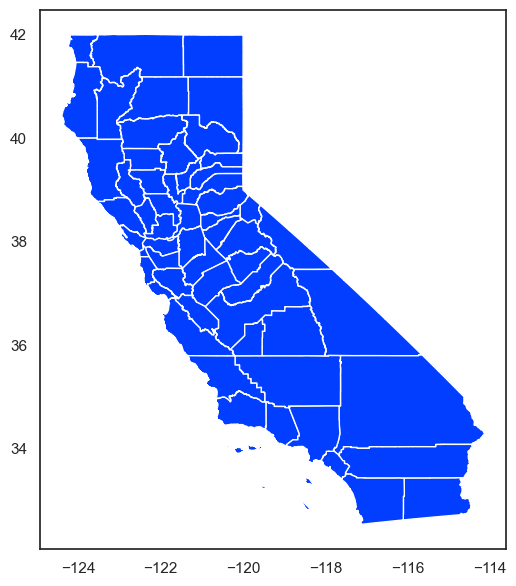

In [38]:
fig, ax = plt.subplots(figsize=(7,7))

gdf_counties.plot(
    ax=ax
)

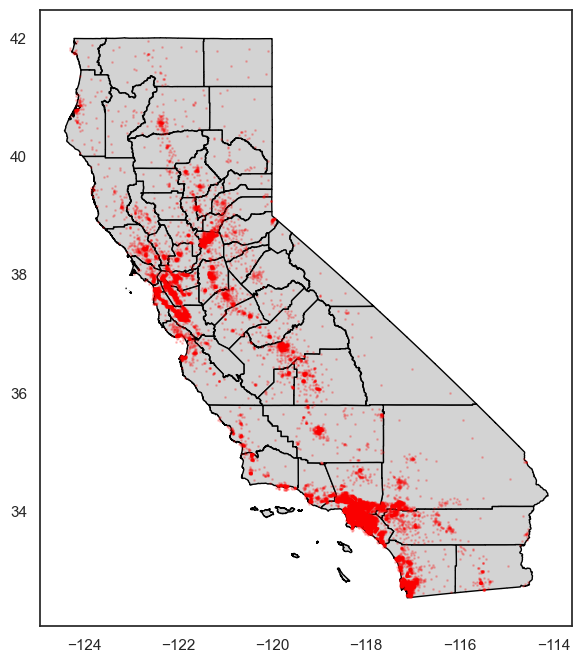

In [39]:
fig, ax = plt.subplots(figsize=(8,8))

gdf_counties.plot(
    ax=ax,
    color='lightgray',
    edgecolor='black'
)

ax.scatter(
    gdf_joined['longitude'],
    gdf_joined['latitude'],
    color='red',
    s=1,
    alpha=SCATTER_ALPHA
)


plt.show()

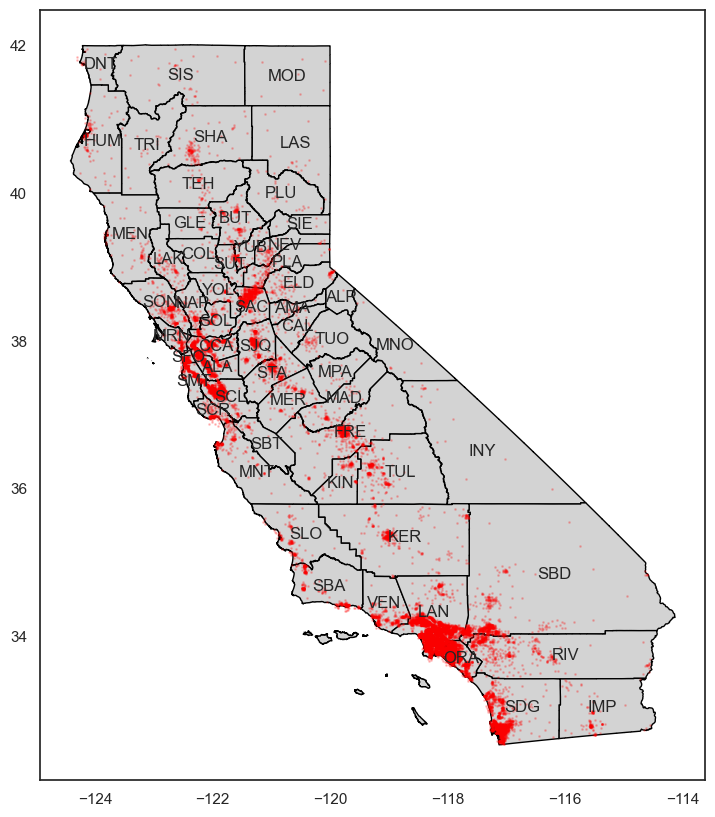

In [40]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_counties.plot(
    ax=ax,
    color='lightgray',
    edgecolor='black'
)

ax.scatter(
    gdf_joined['longitude'],
    gdf_joined['latitude'],
    color='red',
    s=1,
    alpha=SCATTER_ALPHA
)

for x, y, abbrev in zip(gdf_counties['centroid'].x, gdf_counties['centroid'].y, gdf_counties['abbrev']):
    ax.text(x, y, abbrev, ha='center', va='center')

plt.show()

In [41]:
gdf_joined.groupby('name').median(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_households,population_per_househoulds,bedrooms_per_room
name,,,,,,,,,,,,,
Alameda,-122.129997,37.709999,35.0,1938.0,399.0,1039.0,382.0,3.57140,188600.0,3.0,5.075716,2.719877,0.207107
Alpine,-119.860001,38.824997,18.5,1407.5,334.0,402.5,203.5,2.00180,165050.0,2.0,7.331940,2.027528,0.236384
Amador,-120.720001,38.430000,17.0,1787.0,357.0,767.0,305.0,3.04650,116700.0,3.0,6.058824,2.435115,0.191900
Butte,-121.599998,39.709999,22.0,1875.0,372.5,936.5,356.5,2.31895,86450.0,2.0,5.308164,2.514830,0.199470
Calaveras,-120.559998,38.200001,17.0,2745.0,559.0,1061.0,459.0,2.56670,101600.0,2.0,5.994983,2.488000,0.204878
Colusa,-122.044998,39.180000,34.0,1497.0,309.0,665.0,265.0,2.50920,68950.0,2.0,5.468055,2.895284,0.204971
Contra Costa,-122.070000,37.950001,27.0,2399.5,439.5,1143.0,425.5,4.37500,184950.0,3.0,5.677517,2.716802,0.184961
Del Norte,-124.169998,41.764999,19.0,2705.5,560.5,1290.0,486.5,2.22895,76650.0,2.0,5.523724,2.721776,0.207599
El Dorado,-120.709999,38.759998,17.0,2259.0,459.0,916.0,351.0,3.15000,128300.0,3.0,6.183511,2.676471,0.195695


In [42]:
gdf_counties = gdf_counties.merge(
    gdf_joined.groupby('name').median(numeric_only=True),
    left_on='name',
    right_index=True,
)

gdf_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry,centroid,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_households,population_per_househoulds,bedrooms_per_room
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.1839, -121.46238 41.18...",POINT (-122.54047 41.59268),-122.544998,41.614998,23.0,2372.0,482.0,1111.0,427.0,2.17525,63950.0,2.0,5.848729,2.534145,0.201014
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933...",POINT (-123.89681 41.74299),-124.169998,41.764999,19.0,2705.5,560.5,1290.0,486.5,2.22895,76650.0,2.0,5.523724,2.721776,0.207599
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9...",POINT (-120.72517 41.58987),-120.529999,41.575001,22.0,2472.0,473.5,860.5,349.5,2.18775,50250.0,2.0,6.891730,2.537227,0.197889
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7...",POINT (-123.11264 40.65063),-123.125000,40.639999,18.5,954.0,211.5,369.5,154.0,1.90705,77100.0,2.0,6.116148,2.541760,0.225996
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3...",POINT (-122.04016 40.76344),-122.349998,40.570000,19.0,2251.0,463.0,1077.0,412.0,2.40790,85200.0,2.0,5.487129,2.714097,0.198684


C:\Users\rafae\AppData\Local\Temp\ipykernel_22572\3942021345.py:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf_counties.plot(


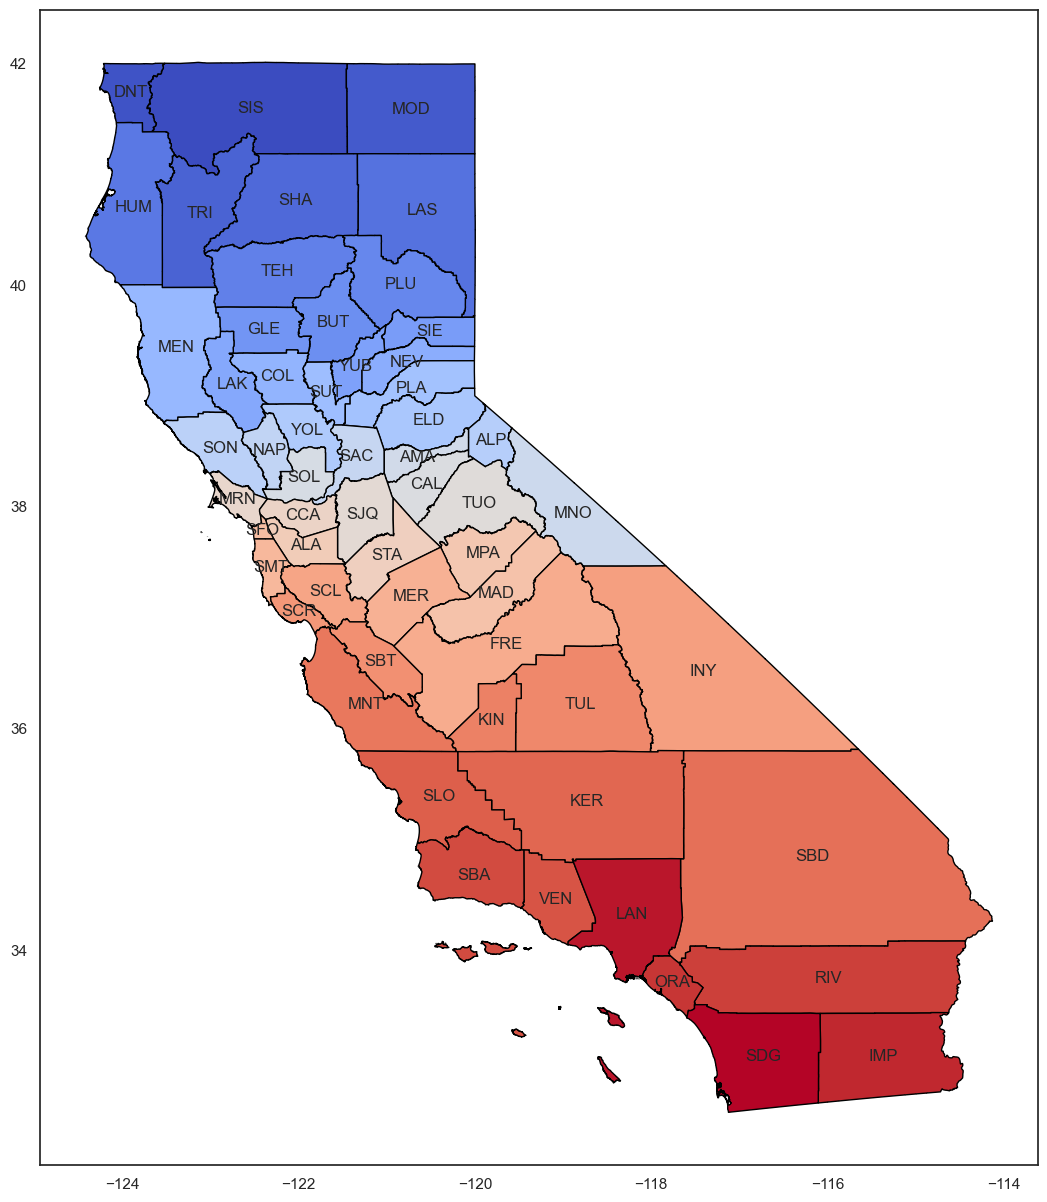

In [84]:
fig, ax = plt.subplots(figsize=(15,15))

gdf_counties.plot(
    ax=ax,
    color='lightgray',
    edgecolor='black',
    column = 'median_house_value',
    cmap = PALETTE,
    legend = True,
    legend_kwds = {'label': 'median_house_value' }
)


for x, y, abbrev in zip(gdf_counties['centroid'].x, gdf_counties['centroid'].y, gdf_counties['abbrev']):
    ax.text(x, y, abbrev, ha='center', va='center')

plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_22572\3532777659.py:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf_counties.plot(


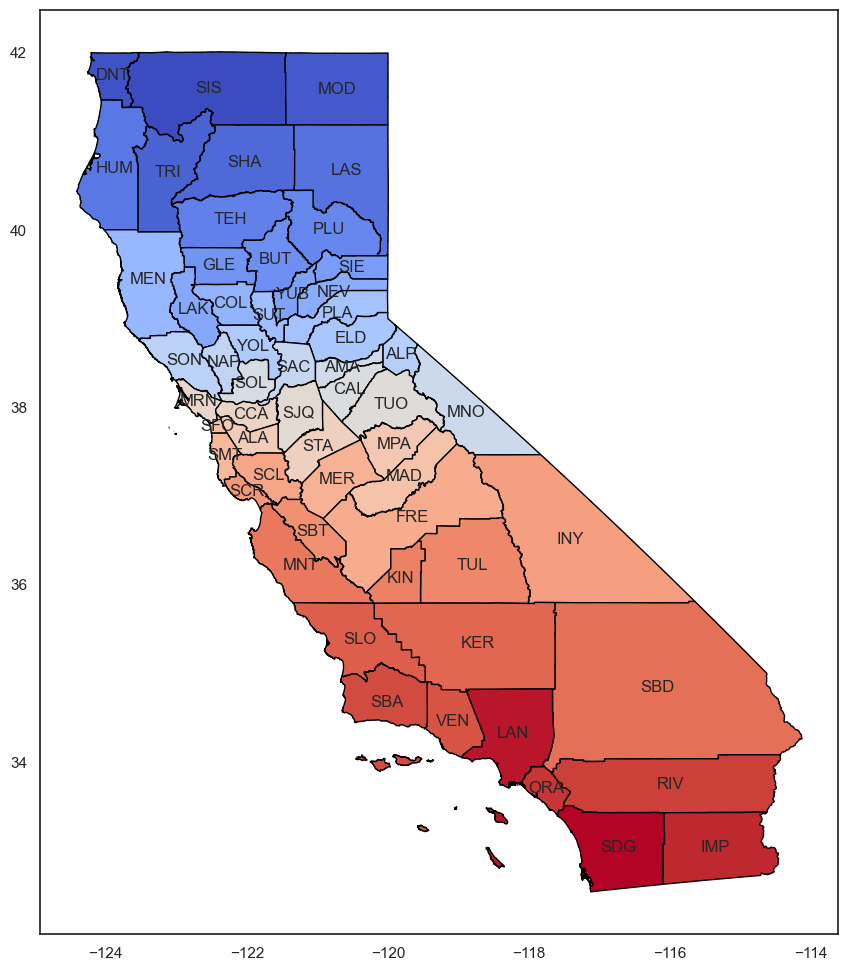

In [88]:
fig, ax = plt.subplots(figsize=(12,12))

gdf_counties.plot(
    ax=ax,
    color='lightgray',
    edgecolor='black',
    column = 'median_income',
    cmap = PALETTE,
    legend = True,
    legend_kwds = {'label': 'median_income' }
)


for x, y, abbrev in zip(gdf_counties['centroid'].x, gdf_counties['centroid'].y, gdf_counties['abbrev']):
    ax.text(x, y, abbrev, ha='center', va='center')

plt.show()